# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [6]:
import keras
from tensorflow import keras # need to import for Adadelta()
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [15]:
import matplotlib.pyplot as  plt
%matplotlib inline

In [16]:
import numpy as np
import pandas as pd

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **

In [39]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

0
4
1
9
2
1
3
1
4


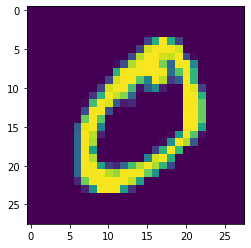

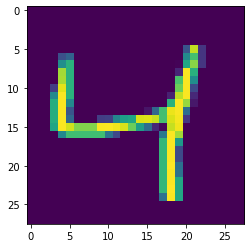

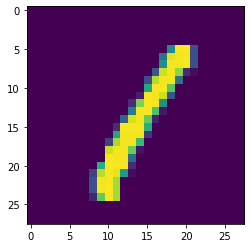

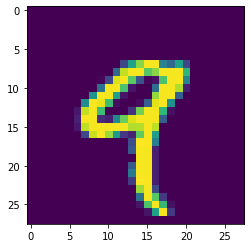

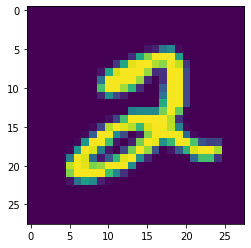

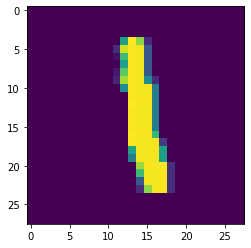

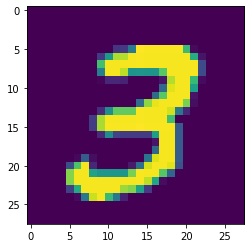

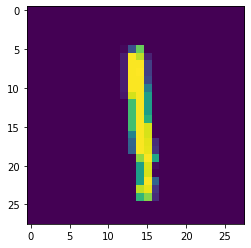

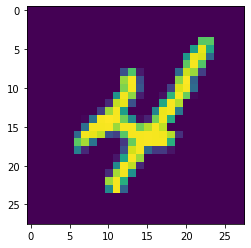

<Figure size 432x288 with 0 Axes>

In [40]:
for i in range(1, 10):
    plt.imshow(x_train[i]) #show the image in the x_train dataset
    plt.figure(i + 1)
    print(y_train[i]) #print the y_train output

In [41]:
x_noise = x_train + np.random.normal(scale = 100, size = x_train.shape) # change scale to 100 to add noise and pixelate images

0
4
1
9
2
1
3
1
4


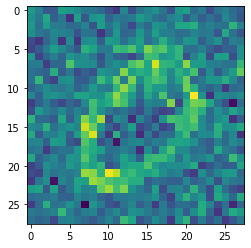

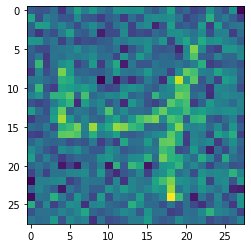

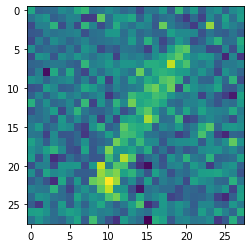

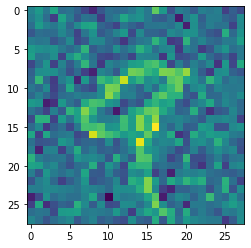

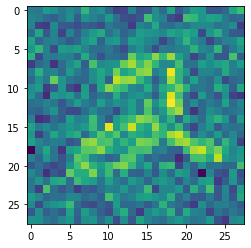

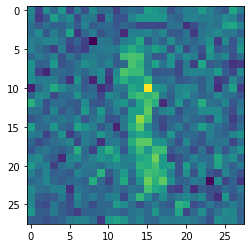

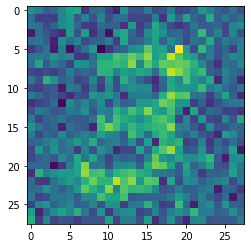

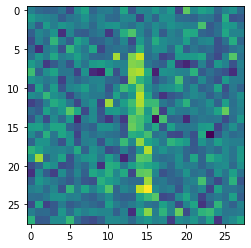

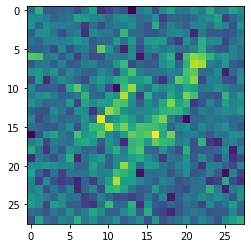

<Figure size 432x288 with 0 Axes>

In [42]:
for i in range(1, 10):
    plt.imshow(x_noise[i]) #show the image in the x_train dataset w/ added noise
    plt.figure(i + 1)
    print(y_train[i]) #print the y_train output

2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

In [43]:
x_noise2 = x_train + np.random.normal(scale = 50, size = x_train.shape)

In [44]:
# Images with noise
print("Image 1:", x_noise2[0, :10])
print("Image 2:", x_noise2[1, :10])
print("Image 3:", x_noise2[2, :10])
print("Image 4:", x_noise2[3, :10])
print("Image 5:", x_noise2[4, :10])

Image 1: [[-2.79743793e+01 -1.90701233e+01 -2.98946753e+01 -3.58719760e+01
  -5.23077010e+01 -1.00297732e+02 -5.29982116e+01  4.02218187e+01
  -3.36377515e+01  4.37031583e+01  3.52476303e+00  3.44353170e+01
  -1.48328311e+00  8.67846629e+00  8.62535837e+01 -4.18690881e+01
  -4.57756064e+01  8.63169308e+01 -1.93741568e+00 -4.81818465e+01
   1.64084993e+01 -1.04281507e+01 -7.07941952e+01 -1.16703286e+01
   1.76588814e+01 -5.61845417e+00 -1.10438764e+01 -3.36421422e+01]
 [ 1.28482217e+02  5.62288445e+01 -3.55715629e+01  4.91604614e+00
  -4.13125331e+00  3.55382857e+01  4.51575166e+01  6.24569174e+01
   3.33689730e+01  2.75695914e+01 -6.49501942e+01  1.41518854e+01
  -6.04097816e+01  2.87160287e+00 -1.47291402e+01 -1.48300078e+01
   2.48681247e+01 -2.47588031e+01 -4.28190596e+01 -2.58244092e+01
   5.88671610e+01  1.26996734e+01  1.44686868e+01  7.56762231e+00
   4.74931194e+01  3.10478637e+00  6.91841259e+01  1.69746777e+01]
 [ 4.56902879e+00  2.37323729e+01 -6.06550841e+01  2.57777521e+01

In [45]:
# Images without noise
print("Image 1:", x_train[0, :5])
print("Image 2:",x_train[1, :5])
print("Image 3:", x_train[2, :5])
print("Image 4:", x_train[3, :5])
print("Image 5:", x_train[5, :5])

Image 1: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Image 2: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]]
Image 3: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [46]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [47]:
scales = [0.1, 0.5, 1.0, 2.0, 4.0] # add in noise
train_accuracy = []
test_accuracy = []

batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for scale in scales:
    x_tr_noise = x_train + np.random.normal(scale = scale, size = x_train.shape)
    x_tst_noise = x_test + np.random.normal(scale = scale, size = x_test.shape)

    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape =  input_shape))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))

    model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])
    
    m_fit = model.fit(x_tr_noise, y_train,
                           batch_size = batch_size,
                           epochs = epochs,
                           verbose = 1,
                           validation_data = (x_test, y_test))
    
    score = model.evaluate(x_tst_noise, y_test, verbose = 0)
    
    train_accuracy.append(m_fit.history['accuracy'][-1])
    test_accuracy.append(score[1])

Epoch 1/12
469/469 [==============================] - 61s 130ms/step - loss: 2.2906 - accuracy: 0.1380 - val_loss: 2.2708 - val_accuracy: 0.3048
Epoch 2/12
469/469 [==============================] - 76s 162ms/step - loss: 2.2627 - accuracy: 0.2049 - val_loss: 2.2353 - val_accuracy: 0.4331
Epoch 3/12
469/469 [==============================] - 76s 162ms/step - loss: 2.2279 - accuracy: 0.2653 - val_loss: 2.1881 - val_accuracy: 0.5332
Epoch 4/12
469/469 [==============================] - 69s 147ms/step - loss: 2.1786 - accuracy: 0.3371 - val_loss: 2.1236 - val_accuracy: 0.5866
Epoch 5/12
469/469 [==============================] - 70s 150ms/step - loss: 2.1116 - accuracy: 0.4036 - val_loss: 2.0345 - val_accuracy: 0.6336
Epoch 6/12
469/469 [==============================] - 59s 126ms/step - loss: 2.0182 - accuracy: 0.4703 - val_loss: 1.9126 - val_accuracy: 0.6673
Epoch 7/12
469/469 [==============================] - 64s 137ms/step - loss: 1.8940 - accuracy: 0.5248 - val_loss: 1.7523 - val_ac

469/469 [==============================] - 79s 168ms/step - loss: 2.3044 - accuracy: 0.1059 - val_loss: 2.2993 - val_accuracy: 0.1406
Epoch 10/12
469/469 [==============================] - 76s 163ms/step - loss: 2.3042 - accuracy: 0.1071 - val_loss: 2.2993 - val_accuracy: 0.1402
Epoch 11/12
469/469 [==============================] - 75s 161ms/step - loss: 2.3038 - accuracy: 0.1093 - val_loss: 2.2992 - val_accuracy: 0.1402
Epoch 12/12
469/469 [==============================] - 79s 168ms/step - loss: 2.3032 - accuracy: 0.1088 - val_loss: 2.2990 - val_accuracy: 0.1430


In [48]:
print("The training accuracy results are:", train_accuracy)
print("The testing accuracy results are:", test_accuracy)

The training accuracy results are: [0.6761333346366882, 0.5599333047866821, 0.31913334131240845, 0.11558333039283752, 0.10876666754484177]
The testing accuracy results are: [0.802299976348877, 0.7583000063896179, 0.5598999857902527, 0.13670000433921814, 0.11620000004768372]


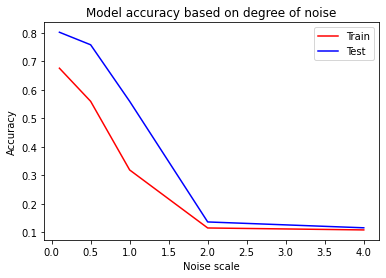

In [49]:
# Model accuracy decreases and noise increases. This is expected.

plt.figure()
plt.plot(scales, train_accuracy, label = 'Train', c = "red")
plt.plot(scales, test_accuracy, label = 'Test', c = "blue")
plt.xlabel('Noise scale')
plt.ylabel('Accuracy')
plt.title('Model accuracy based on degree of noise')
plt.legend()
plt.show()

4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

In [ ]:
# in these results, as noise increases, accuracy decreases. Compared to MultiLayer Perceptron, however, accuracy moves 
# extremely close to zero after adding a noise value of 2 instead of it being a gradual decrease in model accuracy